## Modules

In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
 
from datetime import datetime, timedelta
from itertools import product
from scipy.stats import norm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Log-normal returns simulation

### Normal random vectors

In [2]:
miu0 = 0.12
sig0 = 0.24
numpt0 = 20
randvec0 = np.random.normal(miu0, sig0, numpt0)
print(randvec0, '\n')
print(np.exp(randvec0) - 1)

[ 0.16823523  0.12855673  0.03799552  0.39595486  0.3817257   0.03962573
 -0.08002029 -0.27288584  0.52298822  0.17323947  0.29525281 -0.07577724
  0.16431432  0.16132088  0.31878361  0.2480268   0.22417409 -0.03012344
  0.47738238  0.49004924] 

[ 0.18321491  0.13718593  0.03872658  0.48580225  0.46481023  0.0404213
 -0.07690238 -0.23882032  0.68706144  0.18915084  0.34346596 -0.07297732
  0.17858471  0.17506196  0.37545365  0.28149427  0.25128884 -0.02967425
  0.61184966  0.63239659]


### Fixed-leverage-betting on normally distributed returns

In [3]:
def getfixlevsim(initamt=100, lev=1.00, miu=0.05, sig=0.2, numperiods=60, numsims=1000):
    """
    Obtain dataframe of fixed-leverage-bet simulations, with returns of each interval normally distributed.
    Assume zero-cost-rebalance at the end of each period.
    initamt: initial capital
    miu: (non-annualized) mean return
    sig: (non-annualized) sigma
    numtrials: number of intervals
    numsims: number of simulations
    """
    # Dict for recording different series of total equity
    navdict = {}
    # Generate a total of `numsims`= N series of normally distributed returns
    for num in range(numsims):
        # vector of log returns in each period and exponentiate
        pctarr = np.exp(np.random.normal(miu1, sig1, numperiods))
        # convert into growth factor vector by converting to percentage change vector, multiply by leverage, and add 1
        factorarr = 1 + lev * (pctarr - 1)
        # equity vector by cumulative multiplying by growth factors
        navarr = initamt * factorarr.cumprod()
        # IF equity drops to 0 or even below (due to over-leverage), stop betting, set the remaining equity to 1/10000
        # of initial amount and fix it in the remaining series (for the sake of legal semi-log equity curve plotting)
        # (This artificial "residual equity" is unreal assummption, the reality is more cruel than this!)
        betnum = 1
        ruinamt = initamt / 10000
        while betnum <= numperiods - 1:
            if navarr[betnum] <= ruinamt:
                for j in range(betnum, numperiods):
                    navarr[j] = ruinamt
                break
            betnum += 1
        navdict[f's{num + 1}'] = navarr    
    # Form dataframe from the `navdict` and transpose, so that each row corresponds to a betting series
    dfbet = pd.DataFrame(navdict).transpose()
    # Rename columns so that each number in column labels corresponds to the k-th trial
    dfbet = dfbet.rename(columns={k: (k+1) for k in dfbet.columns})
    
    return dfbet
    

### Sample of 20 simulations of 12 periods

In [4]:
initamt1 = 100
lev1 = 2.00
miu1 = 0.04
sig1 = 0.16
numperiods1 = 12
numsims1 = 20

dfbet1 = getfixlevsim(initamt1, lev1, miu1, sig1, numperiods1, numsims1) 
np.round(dfbet1, 2)

1       2       3       4       5       6       7       8       9   \
s1   107.07   80.42   80.80  101.61   55.84  114.56  167.89  138.75  203.85   
s2   114.35  104.10   75.33   56.51   56.39   47.13   53.36   26.94   39.23   
s3   146.91  167.18  250.20  199.71  160.24  177.98  197.48  139.16  152.73   
s4    94.11   54.34   50.43   51.72   57.12   46.92   42.04   51.23   61.11   
s5   201.88  125.13  127.68  133.80  179.53  167.21  189.55  230.16  280.01   
s6    99.94   79.17   40.26   39.87   33.89   29.59   33.22   29.31   37.39   
s7    83.77  101.21   57.54   57.70   62.30   37.36   34.87   15.54   22.56   
s8   109.39   96.33   97.79  162.12  147.78  189.34  164.35  179.89  153.96   
s9    94.90   55.94   77.77   88.08  116.96  152.35  120.24   56.18   78.37   
s10  112.40  119.23  150.36  188.29  136.97  101.78   93.63  129.92   96.23   
s11  143.26  118.41  229.63  255.45  309.13  369.57  457.54  705.56  766.07   
s12  121.06  233.16  363.60  416.83  469.05  806.39  573.84  532.94  479.35   
s13  165.42  147.94   53.84   67.46   73.25   44.01   55.82   49.47   45.61   
s14  147.12  199.42  134.93  121.58  125.51  200.59  285.54  488.43  466.22   
s15  118.32  105.96  121.99  120.13   83.31   91.01   88.73  163.38  199.62   
s16  164.71  167.66  125.56  174.09  155.28   94.66  136.49  227.57  289.51   
s17  105.63  109.40  174.31  176.52  192.38  214.84  199.88  241.57  398.79   
s18   92.30  103.15  112.05  120.94  125.74  185.72  248.73  392.28  428.14   
s19  102.64  128.33  131.25  129.68  136.45  145.24  120.10   94.30  146.73   
s20  130.18  200.22  238.67  289.39  394.72  328.46  213.24  187.51  256.54   

          10      11       12  
s1    243.32  281.30   241.87  
s2     58.56   30.60    45.78  
s3    209.78  274.31   318.08  
s4     72.92  100.17   183.56  
s5    303.57  534.31   625.66  
s6     41.69   70.78    86.80  
s7     22.10   39.72    19.11  
s8    120.03  125.38   159.74  
s9     54.95   65.22   108.10  
s10   162.35  146.37   146.44  
s11  1043.43  904.54  1047.53  
s12   533.43  514.87   869.98  
s13    78.50   74.13    44.48  
s14   551.14  726.70   660.58  
s15   229.09  206.43   335.96  
s16   159.99  258.66   256.99  
s17   570.58  566.14   498.76  
s18   316.12  265.44   355.32  
s19   112.13  129.91   202.49  
s20   122.08  200.48   201.49

## Equity curve plotting

### Simulation KPIs

In [5]:
def getsimkpi(initamt=100, lev=1.00, miu=0.05, sig=0.2, numperiods=60, numsims=1000):
    """Obtain a dictionary of final performance KPI of simulations. """
    dfbet = getfixlevsim(initamt, lev, miu, sig, numperiods, numsims)
    kpidict = {}
    kpidict['miu'] = miu
    kpidict['sig'] = sig
    kpidict['lev'] = lev
    kpidict['nasharpe'] = round(miu * (numperiods ** 0.5) / sig, 4)
    kpidict['win%'] = round(100 * dfbet[dfbet[numperiods] >= initamt].shape[0] / numsims, 2)
    kpidict['endavg'] = round(dfbet[numperiods].mean(), 2)
    kpidict['endmed'] = round(dfbet[numperiods].median(), 2)
    kpidict['endstd'] = round(dfbet[numperiods].std(), 2)      
    
    return dfbet, kpidict

### Sample 1 (same parameter as above)

In [6]:
initamt1 = 100
lev1 = 2.00
miu1 = 0.03
sig1 = 0.15
numperiods1 = 36
numsims1 = 1000

dfbet1, kpidict1 = getsimkpi(initamt1, lev1, miu1, sig1, numperiods1, numsims1) 
kpidict1

{'miu': 0.03,
 'sig': 0.15,
 'lev': 2.0,
 'nasharpe': 1.2,
 'win%': 75.5,
 'endavg': 1930.28,
 'endmed': 374.12,
 'endstd': 8232.7}

### Function

In [7]:
def plotsimcurves(initamt=100, lev=1.00, miu=0.05, sig=0.2, numperiods=60, numsims=1000):
    """Plot equity curves from the betting simulations."""
    # Dataframe and KPI dict from `getsimkpi()` function
    dfbet, kpidict =  getsimkpi(initamt, lev, miu, sig, numperiods, numsims)
    # First line of diagram title
    title = f'{numsims} simulations of {numperiods}-periods \n'
    title += f'leverage {round(lev, 4)}, miu {round(100*miu, 2)}%, sig {round(100*sig, 2)}%\n'
    # Percentage of final equity above or equal to initial amount 
    endwinrate = kpidict['win%']
    endavgequity = kpidict['endavg'] # Arithmetic mean of final equity
    endmedequity = kpidict['endmed'] # Median of final equity
    endstdequity = kpidict['endstd'] # SD of final equity
    # Attach key stats to title text
    sharpe = kpidict['nasharpe']
    title += f'NA-sharpe: {sharpe}, final winrate: {endwinrate}% \n'
    title += f'Final equity mean: {endavgequity}, median: {endmedequity}, SD: {endstdequity}'
    # Plot figure
    fig = plt.figure(figsize=(12, 9))
    # Append title
    fig.suptitle(title, fontsize=12)
    # Transpose the equity dataframe to plot 
    dfplot = dfbet.transpose()
    # Adopt semi-log scale for fixed-percent-betting & linear scale for fixed-amount-betting
    plt.semilogy(dfplot)
    plt.plot(dfplot.index, np.repeat(initamt, numperiods), color='black', linewidth=3, linestyle='dashed')
    plt.show()

### Plotting simulations of sample 1

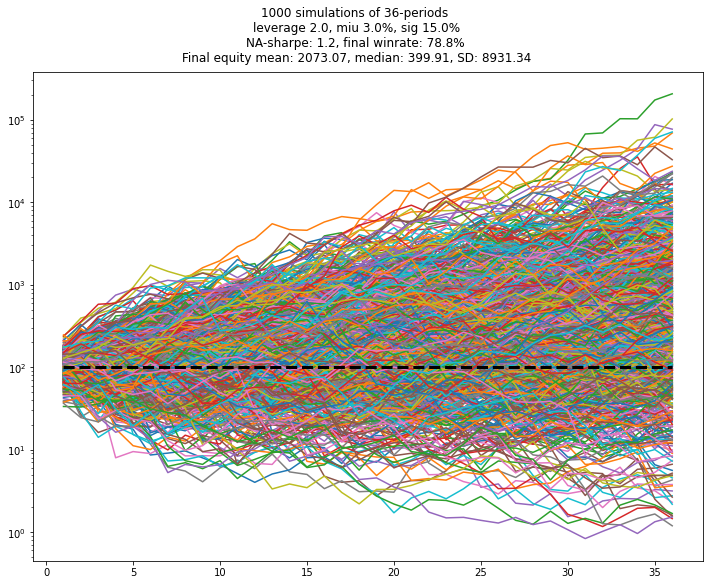

In [8]:
plotsimcurves(initamt1, lev1, miu1, sig1, numperiods1, numsims1)

### Reduce  `sig` with everything else unchanged

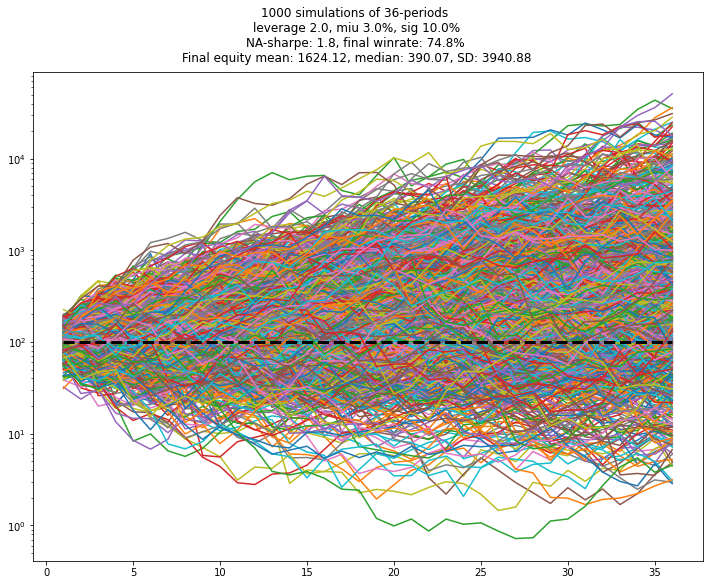

In [9]:
sig2 = 0.1
plotsimcurves(initamt1, lev1, miu1, sig2, numperiods1, numsims1)

### Raise both `miu` & `sig` but keeps NA-sharpe and leverage unchanged

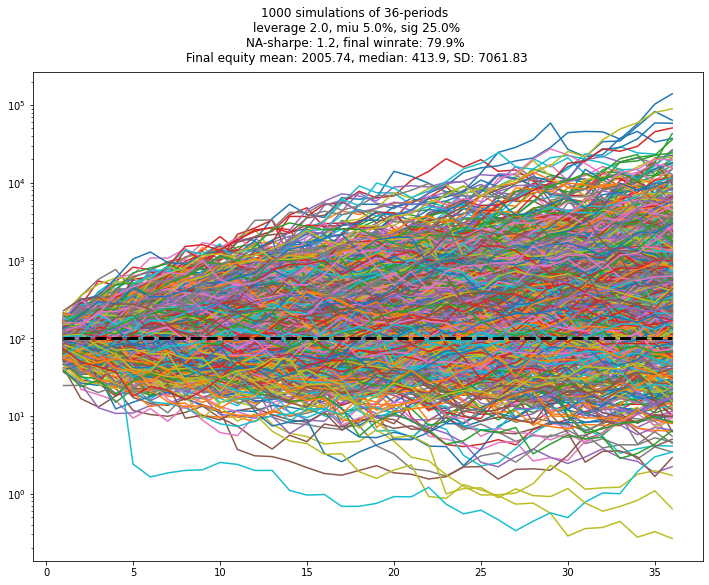

In [10]:
sharpe1 = 1.2 / (numperiods1 ** 0.5)
miu3 = 0.05
sig3 = sig1 * miu3 / miu1

plotsimcurves(initamt1, lev1, miu3, sig3, numperiods1, numsims1)

### Function to check MDD

In [11]:
def pctmdd(dfbet, mddlevels=(0.25, 0.5, 0.75)):
    """Obtain percentage of simulations with final amount dropping below the given equity threshold."""
    # Transpose the simulation dataframe
    dfbett = dfbet.transpose()
    numtrials = dfbet.shape[1]
    numsim = dfbet.shape[0]
    # Compute MDD
    dfmdd = pd.DataFrame(columns=dfbett.columns)
    for col in dfbett.columns:
        dfmdd[col] = (dfbett[col] / dfbett[col].cummax() - 1).cummin()
    # Tranpose back to match original shape
    dfmdd = dfmdd.transpose()
    # Compute percentage of simulations having MDD greater than the levels
    mdddict = {}
    for value in mddlevels:
        mdddict[value] = dfmdd[dfmdd[numtrials] <= -value].shape[0] / numsim

    
    return dfmdd, mdddict   

### Using example 1

In [12]:
dfmdd1, mdddict1 = pctmdd(dfbet1)
for key, value in mdddict1.items():
    print(f'\n Percentage of betting series suffering {round(100*key)}% MDD: {round(100*value, 2)}%')


 Percentage of betting series suffering 25% MDD: 100.0%

 Percentage of betting series suffering 50% MDD: 89.1%

 Percentage of betting series suffering 75% MDD: 47.1%


### Using example 3

In [13]:
dfbet3, kpidict3 = getsimkpi(initamt1, lev1, miu3, sig3, numperiods1, numsims1) 

dfmdd3, mdddict3 = pctmdd(dfbet3)
for key, value in mdddict3.items():
    print(f'\n Percentage of betting series suffering {round(100*key)}% MDD: {round(100*value, 2)}%')


 Percentage of betting series suffering 25% MDD: 99.8%

 Percentage of betting series suffering 50% MDD: 89.3%

 Percentage of betting series suffering 75% MDD: 46.8%


## Optimal leverage (Kelly formula of continuous returns)

### Expected geometric growth (for normally distributed returns)

- Reference: Edward Thorp, The Kelly Criterion in Blackjack, Sports Betting, and the Stock Market (1997)

In [14]:
def getnormgrow(lev=1.00, miu=0.03, sig=0.15, n=1):
    """Obtain expected geometric returns of random walk returns."""
    growth = n * lev * (miu - sig**2 * lev / 2)
    
    return growth

def plotlevgrow(miu=0.03, sig=0.15, n=1, levmin=0.20, levmax=4.0, step=0.001):
    """Plot expected geometric growth given miu & sigma, and identify optimal leverage."""
    # Form pandas Series of expected return of varying leverage
    levarr = np.arange(levmin, levmax, step)
    growdict = {lev: getnormgrow(lev, miu, sig, n) for lev in levarr}
    dfgrow = pd.DataFrame(pd.Series(growdict))
    # Plot interactive diagram of f-percent curve
    fig = px.line(x=dfgrow.index, y=dfgrow[0], labels={'x': 'lev', 'y': f'growth factor on {n} periods'})
    fig.add_trace(go.Scatter(x=dfgrow.index, y=np.repeat(0, len(levarr)), name='0%'))
    # Identify optimal leverage
    bestlev = round(dfgrow[0].idxmax(), 4)
    bestpl = round(dfgrow[0].max(), 4)
    fig.add_trace(go.Scatter(x=(bestlev, ), y=(bestpl, ), line_color='green', name='Opt-lev', mode='markers+text', 
                             marker_size=10, text=f'{bestlev, round(bestpl, 4)}', textposition='bottom center'))
    # Title
    fig.update_layout(title=f'Expected geometric growoth of N({miu}, {sig})', title_x=0.5, width=1000, height=500)
    # Show diagram
    fig.show()

In [15]:
getnormgrow(lev1, miu1, sig1, numperiods1)

0.54

In [16]:
plotlevgrow(miu1, sig1, numperiods1)

In [17]:
plotlevgrow(miu1, sig2, numperiods1, 1.0, 5.0)

In [18]:
plotlevgrow(miu3, sig3, numperiods1, 0.2, 2.0)

### Kelly optimal leverage (for normally distributed returns ONLY)

In [19]:
def getkellylev(miu, sig):
    """Obtain Kelly formula of optimal leverage."""
    return round(max(miu / sig**2, 0), 4)

### Kelly leverage for a bunch of (`miu`, `sig`) pair

- reasonable range of monthly returns: 0.5% - 5%  (annualized log-returns: 6% - 60%)
- reasonable range of monthly volatility: 5% - 36%  (annualized volatility:  18% - 126%)

In [20]:
miuarr = np.arange(0.5, 5.5, 0.5) / 100
sigarr = np.arange(0.18, 1.38, 0.12) / (12**0.5)
nummonths = 36

dfoptlev = pd.DataFrame()
for miu, sig in product(miuarr, sigarr):
    dfoptlev.loc[f'{round(100*miu, 2)}%', f'{round(100*sig, 2)}%'] = round(miu / sig**2, 4)
    
dfoptlev

5.2%   8.66%  12.12%  15.59%  19.05%  22.52%  25.98%  29.44%  32.91%  \
0.5%   1.8519  0.6667  0.3401  0.2058  0.1377  0.0986  0.0741  0.0577  0.0462   
1.0%   3.7037  1.3333  0.6803  0.4115  0.2755  0.1972  0.1481  0.1153  0.0923   
1.5%   5.5556  2.0000  1.0204  0.6173  0.4132  0.2959  0.2222  0.1730  0.1385   
2.0%   7.4074  2.6667  1.3605  0.8230  0.5510  0.3945  0.2963  0.2307  0.1847   
2.5%   9.2593  3.3333  1.7007  1.0288  0.6887  0.4931  0.3704  0.2884  0.2308   
3.0%  11.1111  4.0000  2.0408  1.2346  0.8264  0.5917  0.4444  0.3460  0.2770   
3.5%  12.9630  4.6667  2.3810  1.4403  0.9642  0.6903  0.5185  0.4037  0.3232   
4.0%  14.8148  5.3333  2.7211  1.6461  1.1019  0.7890  0.5926  0.4614  0.3693   
4.5%  16.6667  6.0000  3.0612  1.8519  1.2397  0.8876  0.6667  0.5190  0.4155   
5.0%  18.5185  6.6667  3.4014  2.0576  1.3774  0.9862  0.7407  0.5767  0.4617   

      36.37%  
0.5%  0.0378  
1.0%  0.0756  
1.5%  0.1134  
2.0%  0.1512  
2.5%  0.1890  
3.0%  0.2268  
3.5%  0.2646  
4.0%  0.3023  
4.5%  0.3401  
5.0%  0.3779

### NA-sharpe for a bunch of (`miu`, `sig`) pair

In [21]:
dfsharpe = pd.DataFrame()

for miu, sig in product(miuarr, sigarr):
    dfsharpe.loc[f'{round(100*miu, 2)}%', f'{round(100*sig, 2)}%'] = round(miu / sig * (nummonths ** 0.5), 4)
    
dfsharpe

5.2%   8.66%  12.12%  15.59%  19.05%  22.52%  25.98%  29.44%  32.91%  \
0.5%  0.5774  0.3464  0.2474  0.1925  0.1575  0.1332  0.1155  0.1019  0.0912   
1.0%  1.1547  0.6928  0.4949  0.3849  0.3149  0.2665  0.2309  0.2038  0.1823   
1.5%  1.7321  1.0392  0.7423  0.5774  0.4724  0.3997  0.3464  0.3057  0.2735   
2.0%  2.3094  1.3856  0.9897  0.7698  0.6298  0.5329  0.4619  0.4075  0.3646   
2.5%  2.8868  1.7321  1.2372  0.9623  0.7873  0.6662  0.5774  0.5094  0.4558   
3.0%  3.4641  2.0785  1.4846  1.1547  0.9448  0.7994  0.6928  0.6113  0.5470   
3.5%  4.0415  2.4249  1.7321  1.3472  1.1022  0.9326  0.8083  0.7132  0.6381   
4.0%  4.6188  2.7713  1.9795  1.5396  1.2597  1.0659  0.9238  0.8151  0.7293   
4.5%  5.1962  3.1177  2.2269  1.7321  1.4171  1.1991  1.0392  0.9170  0.8204   
5.0%  5.7735  3.4641  2.4744  1.9245  1.5746  1.3323  1.1547  1.0189  0.9116   

      36.37%  
0.5%  0.0825  
1.0%  0.1650  
1.5%  0.2474  
2.0%  0.3299  
2.5%  0.4124  
3.0%  0.4949  
3.5%  0.5774  
4.0%  0.6598  
4.5%  0.7423  
5.0%  0.8248

### Expected final equity on optimal leverage

In [22]:
dfpl = pd.DataFrame()

for miu, sig in product(miuarr, sigarr):
    optlev = dfoptlev.loc[f'{round(100*miu, 2)}%', f'{round(100*sig, 2)}%']
    dfpl.loc[f'{round(100*miu, 2)}%', f'{round(100*sig, 2)}%'] = round(100 * np.exp(getnormgrow(optlev, miu, sig, nummonths)), 2)
    
dfpl

5.2%     8.66%   12.12%  15.59%  19.05%  22.52%  25.98%  29.44%  \
0.5%  1.181400e+02    106.18   103.11  101.87  101.25  100.89  100.67  100.52   
1.0%  1.947700e+02    127.12   113.03  107.69  105.08  103.61  102.70  102.10   
1.5%  4.481700e+02    171.60   131.72  118.14  111.80  108.32  106.18  104.78   
2.0%  1.439190e+03    261.17   163.20  134.49  121.94  115.26  111.26  108.66   
2.5%  6.450010e+03    448.17   214.97  158.88  136.33  124.84  118.14  113.86   
3.0%  4.034288e+04    867.11   301.03  194.77  156.25  137.65  127.12  120.54   
3.5%  3.521586e+05   1891.58   448.17  247.79  183.57  154.48  138.63  128.96   
4.0%  4.290170e+06   4652.55   709.35  327.13  221.09  176.48  153.21  139.40   
4.5%  7.294164e+07  12902.42  1193.64  448.17  272.95  205.22  171.60  152.26   
5.0%  1.730778e+09  40342.88  2135.37  637.16  345.45  242.92  194.77  168.04   

      32.91%  36.37%  
0.5%  100.42  100.34  
1.0%  101.68  101.37  
1.5%  103.81  103.11  
2.0%  106.87  105.59  
2.5%  110.95  108.88  
3.0%  116.14  113.03  
3.5%  122.58  118.14  
4.0%  130.46  124.32  
4.5%  140.01  131.72  
5.0%  151.51  140.51

## Adopt real stock price and check historical results on using leverage

### Collecting OHLC data

In [23]:
import yfinance as yf

def getyahoodata(symbollist, adjust=True, startstr='1990-01-01', endstr='2046-12-31'):
    """Scrape via yahoo API to obtain data for a symbollist."""
    symbolstr = ' '.join(symbollist)
    renamedict = {'Date': 'date', 'Open': 'op', 'High': 'hi', 'Low': 'lo', 'Close': 'cl', 'Volume': 'vol',
                   'Adj Close': 'adj_cl', 'Dividends': 'div', 'Stock Splits': 'split'}
    ohlcvdfield = ['op', 'hi', 'lo', 'cl', 'vol', 'div']
    datadict = {}

    try:
        dfdata = yf.download(symbolstr, start=startstr, end=endstr, auto_adjust=False, actions=True, 
                         group_by='Tickers', threads=16)
    except:
        dfdata = pd.DataFrame()

    for symbol in symbollist:
        #try:
        dfsymbol = dfdata[(symbol, )].dropna()  # Raw data for the symbol
        dfsymbol = dfsymbol[(dfsymbol['Volume'] > 0) | (dfsymbol['High'] > dfsymbol['Low'])] # Filter bad data
        dfsymbol = dfsymbol.reset_index()
        dfsymbol = dfsymbol.rename(columns=renamedict)
        dfsymbol = dfsymbol.set_index('date')
        if not adjust:
            dfsymbol = dfsymbol[ohlcvdfield]
            dfsymbol = dfsymbol.rename(columns={field: f'{symbol}_{field}' for field in ohlcvdfield})
        else:
            adjfactor = dfsymbol['adj_cl'] / dfsymbol['cl']
            for field in ohlcvdfield[:-2]:
                dfsymbol[f'adj_{field}'] = dfsymbol[field] * adjfactor
            dfsymbol['adj_vol'] = dfsymbol['vol'] / adjfactor
            dfsymbol = dfsymbol[[f'adj_{field}' for field in ohlcvdfield[:-1]]]
            dfsymbol = dfsymbol.rename(columns={f'adj_{field}': f'{symbol}_{field}' for field in ohlcvdfield[:-1]})
            dfsymbol = np.round(dfsymbol, 4)
        datadict[symbol] = dfsymbol
        #except:
        #    print(f'Failed preparing data for {symbol}.')

    dfallsymbols = pd.concat(datadict.values(), axis=1, join='inner')
    dfallsymbols = dfallsymbols.fillna(method='ffill')
    dfallsymbols = np.round(dfallsymbols, 4)

    return dfallsymbols

etflist = ['SPY', 'QQQ', 'SMH', 'ARKK', 'EWH']
chipslist = ['TSLA', 'MSFT', 'NVDA', 'AMZN', 'MSCI']
assetlist = etflist + chipslist

startstr = '2010-07-02'
endstr = '2022-07-01'
dfohlcall = getyahoodata(assetlist, True, startstr, endstr)
dfohlcall.index

[*********************100%***********************]  10 of 10 completed


DatetimeIndex(['2014-10-31', '2014-11-03', '2014-11-04', '2014-11-05',
               '2014-11-06', '2014-11-07', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13',
               ...
               '2022-06-16', '2022-06-17', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='date', length=1921, freq=None)

### Resample into monthly OHLC

In [24]:
def ohlcresample(dfohlc, assetlist, freq='M'):
    """Resample the OHLC dataframe into desired timeframe."""
    aggrule = {}
    for asset in assetlist:
        aggrule[f'{asset}_op'] = 'first'
        aggrule[f'{asset}_hi'] = 'max'
        aggrule[f'{asset}_lo'] = 'min'
        aggrule[f'{asset}_cl'] = 'last'
        aggrule[f'{asset}_vol'] = 'sum'
    dfnew = dfohlc.resample(rule=freq, label='right').agg(aggrule)
    
    return dfnew

dfmonthall = ohlcresample(dfohlcall, assetlist)
dfmonthall.iloc[-12:, :10]

SPY_op    SPY_hi    SPY_lo    SPY_cl       SPY_vol    QQQ_op  \
date                                                                         
2021-07-31  422.8578  435.6066  416.0545  432.3627  1.442324e+09  352.1138   
2021-08-31  434.1670  446.7186  429.9865  445.2297  1.271831e+09  364.2563   
2021-09-30  446.2158  447.6848  424.1235  424.4796  1.767033e+09  378.9347   
2021-10-31  426.2996  454.5692  421.7297  454.2626  1.525229e+09  357.0141   
2021-11-30  455.3012  468.3974  450.3555  450.6127  1.350012e+09  384.8504   
2021-12-31  456.6266  475.4627  444.0448  471.4525  1.946093e+09  396.5186   
2022-01-31  472.7826  476.4355  417.6528  446.5875  2.503657e+09  397.7926   
2022-02-28  447.3518  454.7369  407.6075  433.4056  2.315071e+09  363.2817   
2022-03-31  431.8273  460.0826  412.0544  449.6974  2.396000e+09  344.6606   
2022-04-30  451.3603  455.8608  409.4413  410.2279  1.864778e+09  362.1139   
2022-05-31  410.2976  427.8120  378.9033  411.1539  2.428925e+09  312.2298   
2022-06-30  413.3843  415.6445  362.1700  377.2500  1.963677e+09  309.8744   

              QQQ_hi    QQQ_lo    QQQ_cl       QQQ_vol  
date                                                    
2021-07-31  366.8519  350.0949  362.5557  8.178041e+08  
2021-08-31  378.6563  357.9712  377.8508  6.872637e+08  
2021-09-30  380.6652  355.5207  356.3769  9.364632e+08  
2021-10-31  384.5717  348.7707  384.4024  8.826515e+08  
2021-11-30  406.9024  382.7199  392.0783  9.263413e+08  
2021-12-31  403.3052  376.2806  396.5964  1.237861e+09  
2022-01-31  401.0124  333.0971  361.9060  1.853042e+09  
2022-02-28  368.9339  317.2572  345.7072  1.527737e+09  
2022-03-31  371.1166  316.4497  361.8445  1.691407e+09  
2022-04-30  368.6015  312.0003  312.6490  1.504846e+09  
2022-05-31  329.6563  279.6724  307.6885  1.954913e+09  
2022-06-30  313.9565  268.7634  280.2800  1.361285e+09

### Compute optimal leverage of all symbols in every 36-month-period

In [25]:
nummonths = 36
startstr1 = dfmonthall.index[-1-nummonths].strftime('%Y-%m-%d')
endstr1 = dfmonthall.index[-1].strftime('%Y-%m-%d')

dfopthist = pd.DataFrame(columns=['miu', 'sig', 'NAsharpe', 'optlev'])
dfpct = pd.DataFrame()

for asset in assetlist:
    dfmonth = dfmonthall.loc[startstr1:endstr1, [f'{asset}_cl']]
    dfpct[f'{asset}_pct'] = np.round(np.log(dfmonth[f'{asset}_cl'] / dfmonth[f'{asset}_cl'].shift(1)), 5)
    dfpct[f'{asset}_chg'] = np.round(dfmonth[f'{asset}_cl'] / dfmonth[f'{asset}_cl'].shift(1) - 1, 5)
    dfopthist.loc[asset, 'miu'] = round(dfpct[f'{asset}_pct'].mean(), 5)
    dfopthist.loc[asset, 'sig'] = round(dfpct[f'{asset}_pct'].std(), 5)
    dfopthist.loc[asset, 'NAsharpe'] = round(dfopthist.loc[asset, 'miu']/dfopthist.loc[asset, 'sig']*(nummonths**0.5), 4)
    dfopthist.loc[asset, 'optlev'] = getkellylev(dfopthist.loc[asset, 'miu'] , dfopthist.loc[asset, 'sig'])
    
dfopthist

miu      sig NAsharpe  optlev
SPY   0.00837   0.0539   0.9317   2.881
QQQ   0.01178  0.06212   1.1378  3.0527
SMH   0.01783  0.07548   1.4173  3.1296
ARKK -0.00437  0.12487    -0.21       0
EWH  -0.00213  0.05174   -0.247       0
TSLA  0.07535  0.19959   2.2651  1.8915
MSFT  0.01891  0.05978    1.898  5.2915
NVDA  0.03641   0.1291   1.6922  2.1846
AMZN  0.00319  0.08745   0.2189  0.4171
MSCI  0.01587  0.08305   1.1465  2.3009

### 1x leverage cumulative returns

In [26]:
dfnav0 = pd.DataFrame(index=dfpct.index)

for asset in assetlist:
    dfnav0[f'{asset}_NAV'] = (1 + dfpct[f'{asset}_chg']).cumprod()
    
dfnav0.iloc[0] = 1.00

for asset in assetlist:
    dfnav0[f'{asset}_DD'] = dfnav0[f'{asset}_NAV'] / dfnav0[f'{asset}_NAV'].cummax() - 1
    dfnav0[f'{asset}_MDD'] = dfnav0[f'{asset}_DD'].cummin()
    
productfield = product(assetlist, ['NAV', 'DD', 'MDD'])
dfnav0 = dfnav0[[f'{asset}_{field}' for asset, field in productfield]]
    
dfnav0.iloc[-6:, :12]

SPY_NAV    SPY_DD   SPY_MDD   QQQ_NAV    QQQ_DD   QQQ_MDD  \
date                                                                     
2022-01-31  1.600233 -0.052740 -0.194476  1.972856 -0.087470 -0.129017   
2022-02-28  1.552994 -0.080703 -0.194476  1.884551 -0.128315 -0.129017   
2022-03-31  1.611371 -0.046147 -0.194476  1.972522 -0.087625 -0.129017   
2022-04-30  1.469941 -0.129866 -0.194476  1.704337 -0.211671 -0.211671   
2022-05-31  1.473263 -0.127900 -0.194476  1.677290 -0.224182 -0.224182   
2022-06-30  1.351778 -0.199813 -0.199813  1.527877 -0.293292 -0.293292   

             SMH_NAV    SMH_DD   SMH_MDD  ARKK_NAV   ARKK_DD  ARKK_MDD  
date                                                                    
2022-01-31  2.568483 -0.108130 -0.171623  1.616370 -0.446651 -0.446651  
2022-02-28  2.500855 -0.131613 -0.171623  1.510078 -0.483039 -0.483039  
2022-03-31  2.516160 -0.126298 -0.171623  1.420500 -0.513705 -0.513705  
2022-04-30  2.143668 -0.255641 -0.255641  1.009933 -0.654259 -0.654259  
2022-05-31  2.281055 -0.207935 -0.255641  0.944792 -0.676559 -0.676559  
2022-06-30  1.900073 -0.340226 -0.340226  0.854574 -0.707445 -0.707445

### Append 1x return statistics to optlev dataframe

In [27]:
for asset in assetlist:
    dfopthist.loc[asset, '1xNAV'] = dfnav0.loc[endstr1, f'{asset}_NAV']
    dfopthist.loc[asset, '1xMDD'] = dfnav0.loc[endstr1, f'{asset}_MDD']   

dfopthist

miu      sig NAsharpe  optlev      1xNAV     1xMDD
SPY   0.00837   0.0539   0.9317   2.881   1.351778 -0.199813
QQQ   0.01178  0.06212   1.1378  3.0527   1.527877 -0.293292
SMH   0.01783  0.07548   1.4173  3.1296   1.900073 -0.340226
ARKK -0.00437  0.12487    -0.21       0   0.854574 -0.707445
EWH  -0.00213  0.05174   -0.247       0   0.926252 -0.226760
TSLA  0.07535  0.19959   2.2651  1.8915  15.068011 -0.411742
MSFT  0.01891  0.05978    1.898  5.2915   1.975597 -0.232991
NVDA  0.03641   0.1291   1.6922  2.1846   3.709288 -0.535838
AMZN  0.00319  0.08745   0.2189  0.4171   1.121755 -0.394310
MSCI  0.01587  0.08305   1.1465  2.3009   1.770425 -0.376265

### Adopt optimal leverage to past 36 months

In [28]:
tryassetlist = [asset for asset in assetlist if dfopthist.loc[asset, 'optlev'] > 0]
dfnav = pd.DataFrame(index=dfpct.index)

for asset in tryassetlist:
    dfnav[f'{asset}_NAV'] = (1 + dfopthist.loc[asset, 'optlev'] * dfpct[f'{asset}_chg']).cumprod()
    
dfnav.iloc[0] = 1.0

for i in range(dfnav.shape[1]):
    for j in range(dfnav.shape[0]):
        if dfnav.iloc[j, i] <= 0:
            dfnav.iloc[j:, i] = dfnav.iloc[j, i]
            
for asset in tryassetlist:
    dfnav[f'{asset}_DD'] = dfnav[f'{asset}_NAV'] / dfnav[f'{asset}_NAV'].cummax() - 1
    dfnav[f'{asset}_MDD'] = dfnav[f'{asset}_DD'].cummin()

tryproductfield = product(tryassetlist, ['NAV', 'DD', 'MDD'])
dfnav = dfnav[[f'{asset}_{field}' for asset, field in tryproductfield]]

for asset in assetlist:
    if asset in tryassetlist:
        dfopthist.loc[asset, 'optNAV'] = dfnav.loc[endstr1, f'{asset}_NAV']
        dfopthist.loc[asset, 'optMDD'] = dfnav.loc[endstr1, f'{asset}_MDD']   
    else:
        dfopthist.loc[asset, 'optNAV'] = 1.000
        dfopthist.loc[asset, 'optMDD'] = 0.000

dfopthist

miu      sig NAsharpe  optlev      1xNAV     1xMDD     optNAV  \
SPY   0.00837   0.0539   0.9317   2.881   1.351778 -0.199813   1.780292   
QQQ   0.01178  0.06212   1.1378  3.0527   1.527877 -0.293292   2.332247   
SMH   0.01783  0.07548   1.4173  3.1296   1.900073 -0.340226   3.483509   
ARKK -0.00437  0.12487    -0.21       0   0.854574 -0.707445   1.000000   
EWH  -0.00213  0.05174   -0.247       0   0.926252 -0.226760   1.000000   
TSLA  0.07535  0.19959   2.2651  1.8915  15.068011 -0.411742  56.335130   
MSFT  0.01891  0.05978    1.898  5.2915   1.975597 -0.232991   8.740844   
NVDA  0.03641   0.1291   1.6922  2.1846   3.709288 -0.535838   6.877511   
AMZN  0.00319  0.08745   0.2189  0.4171   1.121755 -0.394310   1.083756   
MSCI  0.01587  0.08305   1.1465  2.3009   1.770425 -0.376265   2.568601   

        optMDD  
SPY  -0.506942  
QQQ  -0.707000  
SMH  -0.809723  
ARKK  0.000000  
EWH   0.000000  
TSLA -0.680227  
MSFT -0.829791  
NVDA -0.888752  
AMZN -0.178080  
MSCI -0.699514

### Closer inspection on day-to-day basis using opt-lev to invest

In [29]:
dfpctday = pd.DataFrame()

for asset in assetlist:
    dfday = dfohlcall.loc[startstr1:endstr1, [f'{asset}_cl']]
    dfpctday[f'{asset}_pct'] = np.round(np.log(dfday[f'{asset}_cl'] / dfday[f'{asset}_cl'].shift(1)), 5)
    dfpctday[f'{asset}_chg'] = np.round(dfday[f'{asset}_cl'] / dfday[f'{asset}_cl'].shift(1) - 1, 5)
    
dfnav1 = pd.DataFrame(index=dfpctday.index)

for asset in assetlist:
    dfnav1[f'{asset}_NAV'] = (1 + dfopthist.loc[asset, 'optlev'] * dfpctday[f'{asset}_chg']).cumprod()
    
dfnav1.iloc[0] = 1.0

for i in range(dfnav1.shape[1]):
    for j in range(dfnav1.shape[0]):
        if dfnav1.iloc[j, i] <= 0:
            dfnav1.iloc[j:, i] = dfnav1.iloc[j, i]
            
for asset in assetlist:
    dfnav1[f'{asset}_DD'] = dfnav1[f'{asset}_NAV'] / dfnav1[f'{asset}_NAV'].cummax() - 1
    dfnav1[f'{asset}_MDD'] = dfnav1[f'{asset}_DD'].cummin()

productfield = product(assetlist, ['NAV', 'DD', 'MDD'])
dfnav1 = dfnav1[[f'{asset}_{field}' for asset, field in productfield]]
    
dfoptday = dfopthist[['miu', 'sig', 'NAsharpe', 'optlev']]
dfoptday.rename(columns={'miu': 'month_miu', 'sig': 'month_sig'}, inplace=True)

for asset in assetlist:
    dfoptday.loc[asset, 'optNAV'] = dfnav1[f'{asset}_NAV'][-1]
    dfoptday.loc[asset, 'optMDD'] = dfnav1[f'{asset}_MDD'][-1]

dfoptday

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month_miu month_sig NAsharpe  optlev     optNAV    optMDD
SPY    0.00837    0.0539   0.9317   2.881   1.444760 -0.744160
QQQ    0.01178   0.06212   1.1378  3.0527   1.646964 -0.754643
SMH    0.01783   0.07548   1.4173  3.1296   1.618774 -0.821023
ARKK  -0.00437   0.12487    -0.21       0   1.000000  0.000000
EWH   -0.00213   0.05174   -0.247       0   1.000000  0.000000
TSLA   0.07535   0.19959   2.2651  1.8915  45.546540 -0.852655
MSFT   0.01891   0.05978    1.898  5.2915   0.626108 -0.958972
NVDA   0.03641    0.1291   1.6922  2.1846   5.748374 -0.872766
AMZN   0.00319   0.08745   0.2189  0.4171   1.090125 -0.206417
MSCI   0.01587   0.08305   1.1465  2.3009   1.805303 -0.763711

### Search opt-lev from historical returns instead of Kelly formula

In [30]:
dfoptreal = dfopthist[['miu', 'sig', 'NAsharpe', 'optlev']]
dfoptreal.rename(columns={'miu': 'month_miu', 'sig': 'month_sig'}, inplace=True)

dfoptreal['optNAV'] = 1.000
dfoptreal['optMDD'] = 0.000

levarr = np.arange(0.2, 5.1, 0.1)

for lev in levarr:
    dfnav2 = pd.DataFrame(index=dfpctday.index)
    
    for asset in assetlist:
        dfnav2[f'{asset}_NAV'] = (1 + lev * dfpctday[f'{asset}_chg']).cumprod()
        
    dfnav2.iloc[0] = 1.0

    for i in range(dfnav2.shape[1]):
        for j in range(dfnav2.shape[0]):
            if dfnav2.iloc[j, i] <= 0:
                dfnav2.iloc[j:, i] = dfnav2.iloc[j, i]
                
    for asset in assetlist:
        dfnav2[f'{asset}_DD'] = dfnav2[f'{asset}_NAV'] / dfnav2[f'{asset}_NAV'].cummax() - 1
        dfnav2[f'{asset}_MDD'] = dfnav2[f'{asset}_DD'].cummin()
        
        if dfnav2[f'{asset}_NAV'][-1] > dfoptreal.loc[asset, 'optNAV']:
            dfoptreal.loc[asset, 'optNAV'] = dfnav2[f'{asset}_NAV'][-1]
            dfoptreal.loc[asset, 'optMDD'] = dfnav2[f'{asset}_MDD'][-1]
            dfoptreal.loc[asset, 'optlev'] = lev
            
    print(f'{round(lev, 1)}x buy-hold-rebalance done.')

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3a05eb773c1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3a05eb773c1a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: 

0.2x buy-hold-rebalance done.
0.3x buy-hold-rebalance done.
0.4x buy-hold-rebalance done.
0.5x buy-hold-rebalance done.
0.6x buy-hold-rebalance done.
0.7x buy-hold-rebalance done.
0.8x buy-hold-rebalance done.
0.9x buy-hold-rebalance done.
1.0x buy-hold-rebalance done.
1.1x buy-hold-rebalance done.
1.2x buy-hold-rebalance done.
1.3x buy-hold-rebalance done.
1.4x buy-hold-rebalance done.
1.5x buy-hold-rebalance done.
1.6x buy-hold-rebalance done.
1.7x buy-hold-rebalance done.
1.8x buy-hold-rebalance done.
1.9x buy-hold-rebalance done.
2.0x buy-hold-rebalance done.
2.1x buy-hold-rebalance done.
2.2x buy-hold-rebalance done.
2.3x buy-hold-rebalance done.
2.4x buy-hold-rebalance done.
2.5x buy-hold-rebalance done.
2.6x buy-hold-rebalance done.
2.7x buy-hold-rebalance done.
2.8x buy-hold-rebalance done.
2.9x buy-hold-rebalance done.
3.0x buy-hold-rebalance done.
3.1x buy-hold-rebalance done.
3.2x buy-hold-rebalance done.
3.3x buy-hold-rebalance done.
3.4x buy-hold-rebalance done.
3.5x buy-h

In [31]:
dfoptreal

month_miu month_sig NAsharpe optlev     optNAV    optMDD
SPY    0.00837    0.0539   0.9317    2.2   1.514037 -0.628067
QQQ    0.01178   0.06212   1.1378    2.2   1.803143 -0.614210
SMH    0.01783   0.07548   1.4173    1.9   2.235437 -0.603063
ARKK  -0.00437   0.12487    -0.21    0.3   1.028140 -0.327551
EWH   -0.00213   0.05174   -0.247      0   1.000000  0.000000
TSLA   0.07535   0.19959   2.2651    2.2  49.938046 -0.899718
MSFT   0.01891   0.05978    1.898    2.5   2.904637 -0.632452
NVDA   0.03641    0.1291   1.6922      2   5.803926 -0.840985
AMZN   0.00319   0.08745   0.2189    0.8   1.115555 -0.373609
MSCI   0.01587   0.08305   1.1465    1.7   1.972470 -0.641180